<a href="https://colab.research.google.com/github/luccasalmeidajr025/Data-Driven-Insights/blob/main/Data_Driven_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Data Driven Insights - Análise de Vendas

## 🧾 Introdução

Este projeto tem como objetivo explorar e analisar um conjunto de dados simulados de vendas, conhecido como **Sample Sales Data**, disponível no Kaggle. Através de técnicas de manipulação e visualização de dados com Python, serão extraídos insights relevantes sobre o desempenho de vendas em diferentes regiões, produtos e períodos.

## 🧰 Ferramentas Utilizadas

- **Python**
- **Google Colab**
- **Pandas** para manipulação de dados
- **NumPy** para operações numéricas
- **Matplotlib** para visualização de dados
- **Estruturas nativas** do Python como listas, tuplas, dicionários, condicionais e laços de repetição

## 📁 Sobre o Conjunto de Dados

O conjunto de dados simula registros de vendas realizadas por uma empresa em diferentes países e regiões.

🛍️ Dados de vendas simuladas:

https://www.kaggle.com/datasets/kyanyoga/sample-sales-data




---


### **1. Instalando Bibliotecas**

In [1]:
%pip install pandas
%pip install matplotlib

### **2. Importação de Bibliotecas**


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **3. Leitura e Exploração Inicial da Base**


In [3]:
import pandas as pd

df = pd.read_csv("/content/sales_data_sample.csv", encoding='ISO-8859-1')
print(df.head())



   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [4]:
print(df.shape)

(2823, 25)


In [5]:
# print(df.columns)

for col in df.columns:
  print(col)

ORDERNUMBER
QUANTITYORDERED
PRICEEACH
ORDERLINENUMBER
SALES
ORDERDATE
STATUS
QTR_ID
MONTH_ID
YEAR_ID
PRODUCTLINE
MSRP
PRODUCTCODE
CUSTOMERNAME
PHONE
ADDRESSLINE1
ADDRESSLINE2
CITY
STATE
POSTALCODE
COUNTRY
TERRITORY
CONTACTLASTNAME
CONTACTFIRSTNAME
DEALSIZE


In [6]:
print(df.dtypes)

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object


### **Insight 1**

>Com **df.head**() observei que a base traz registros de pedidos com informações detalhadas como quantidade, preço unitário e total de vendas. Usando **df.dtypes**, identifiquei que as colunas são compostas principalmente por dados numéricos (como **QUANTITYORDERED, PRICEEACH, SALES**), strings categóricas (como **STATUS, COUNTRY**) e datas. Uma análise rápida também sugere que há variações no tamanho dos pedidos (**DEALSIZE**), podendo ser Small, Medium, etc., o que pode influenciar o volume de vendas.

### **4. Criando Listas, Dicionários e Tuplas**

In [7]:
# Extraindo a coluna CUSTOMERNAME em uma lista
nomes_clientes = df['CUSTOMERNAME'].tolist()

# Exibindo os 5 primeiros com loop
for nome in nomes_clientes[:5]:
    print(f"Cliente: {nome}")


Cliente: Land of Toys Inc.
Cliente: Reims Collectables
Cliente: Lyon Souveniers
Cliente: Toys4GrownUps.com
Cliente: Corporate Gift Ideas Co.


In [8]:
# Criando o dicionário produto:categoria
produto_categoria = dict(zip(df['PRODUCTCODE'], df['PRODUCTLINE']))

# Exibindo 3 pares
for i, (produto, categoria) in enumerate(produto_categoria.items()):
    print(f"{produto}: {categoria}")
    if i == 2:
        break


S10_1678: Motorcycles
S10_1949: Classic Cars
S10_2016: Motorcycles


In [9]:
linha0 = df.iloc[0]

# Cria a tupla com duas strings e um número
minha_tupla = (
    linha0['CUSTOMERNAME'],
    linha0['PRODUCTLINE'],
    linha0['SALES']
)

# Imprime a tupla
print(minha_tupla)



('Land of Toys Inc.', 'Motorcycles', np.float64(2871.0))


### **Insight**
> Ao observar o primeiro registro com **CUSTOMERNAME, PRODUCTLINE e SALES,** nota-se que o cliente Land of Toys Inc. realizou uma compra no valor de $2871.00 em produtos da linha Motorcycles.Ao expandir essa análise para outros clientes e categorias, pode-se identificar quais linhas de produto geram mais receita e quais tipos de clientes mais consomem cada categoria. Isso é útil para ações de marketing direcionadas e para planejamento de estoque com base no perfil dos compradores.

### **Estruturas Condicionais e Laços**


In [10]:
# Seleciona a coluna numérica de interesse
coluna_numerica = 'PRICEEACH'

# Primeiro valor da coluna
primeiro_valor = df[coluna_numerica][0]

# Estrutura condicional para classificar o valor
if primeiro_valor > 90:
    print(" Valor alto")
elif primeiro_valor > 50:
    print(" Valor intermediário")
else:
    print(" Valor baixo")

# FOR: Soma dos 5 primeiros valores da coluna
soma = 0
lista = list(df[coluna_numerica][:5])
for n in lista:
    soma += n
print("Soma dos 5 primeiros valores de:", soma)

# WHILE: Encontrar o primeiro valor maior que 90
limite = 90
i = 0
while i < len(lista) and lista[i] <= limite:
    i += 1

if i < len(lista):
    print("Primeiro valor > 90 encontrado:", lista[i])
else:
    print("Nenhum valor maior que 90 encontrado nos primeiros 5.")


 Valor alto
Soma dos 5 primeiros valores de: 455.05
Primeiro valor > 90 encontrado: 95.7


### **Insight**
> A soma dos cinco primeiros preços unitários foi de 454,05 reais reforçando o potencial de receita mesmo com volumes de vendas não tão altos. Além disso, todos os cinco produtos iniciais têm preços acima de R$80, o que evidencia pouca variação de preços, o que indica uma oportunidade para introduzir produtos mais acessíveis e atrair um público mais amplo.


### **Operadores Aritméticos e Manipulação de Dados**

In [11]:
# Diferença entre duas colunas: Preço unitário e quantidade
if 'PRICEEACH' in df.columns and 'QUANTITYORDERED' in df.columns:
    df['Diferenca'] = df['PRICEEACH'] - df['QUANTITYORDERED']
    print(df[['PRICEEACH', 'QUANTITYORDERED', 'Diferenca']].head())

# Criando nova coluna com preço com 10% de desconto
if 'PRICEEACH' in df.columns:
    df['Desconto'] = df['PRICEEACH'] * 0.9
    print(df[['PRICEEACH', 'Desconto']].head())

   PRICEEACH  QUANTITYORDERED  Diferenca
0      95.70               30      65.70
1      81.35               34      47.35
2      94.74               41      53.74
3      83.26               45      38.26
4     100.00               49      51.00
   PRICEEACH  Desconto
0      95.70    86.130
1      81.35    73.215
2      94.74    85.266
3      83.26    74.934
4     100.00    90.000


**Insight**
>Ao aplicar um desconto de 10% sobre os preços unitários (**PRICEEACH**), percebi que o valor médio economizado por item gira em torno de 8 a 10 reais. A coluna Diferenca, usada de forma hipotética, ajuda a observar a relação entre volume e valor, e mostra que produtos com valor muito alto acabam se destacando frente à quantidade vendida. Isso pode indicar produtos de luxo com baixa rotação.

### **NumPy e Arrays Numéricos**

In [12]:
# Criação do array NumPy com a coluna 'QUANTITYORDERED'
array = np.array(df['QUANTITYORDERED'])

# Operações vetorizadas
array_somado = array + 10
array_quadrado = array ** 2

# Exibição dos 5 primeiros valores
print("Original:", array[:5])
print("Somado +10:", array_somado[:5])
print("Elevado ao quadrado:", array_quadrado[:5])

# Operações agregadas
print("Soma total da quantidade pedida:", array.sum())
print("Média da quantidade pedida:", array.mean())


Original: [30 34 41 45 49]
Somado +10: [40 44 51 55 59]
Elevado ao quadrado: [ 900 1156 1681 2025 2401]
Soma total da quantidade pedida: 99067
Média da quantidade pedida: 35.09280906836698


### **Insight**

>O array NumPy criado com a coluna **QUANTITYORDERED** mostra que os valores oscilam bastante, mas em geral a média das quantidades pedidas gira em torno de 35 unidades por pedido. A operação vetorizada de soma mostrou que muitos pedidos aumentariam significativamente com promoções ou combos, enquanto o quadrado da quantidade destacou o impacto que grandes volumes podem ter na operação logística e no estoque.



### **Acesso e Manipulação de dados**

In [13]:
# 1. Seleção de linha e coluna com .iloc e .loc
linha3 = df.iloc[3]  # Quarta linha
print(" Linha 3 completa:\n", linha3)

# Seleção condicional: produtos com preço unitário acima de 90
filtro_preco = df[df['PRICEEACH'] > 90]
print("\n Produtos com PRICEEACH > 90:\n", filtro_preco[['PRODUCTCODE', 'PRICEEACH']].head())

# Usando .loc para selecionar múltiplas colunas de linhas específicas
selecao_loc = df.loc[0:2, ['ORDERNUMBER', 'PRICEEACH', 'QUANTITYORDERED']]
print("\n Seleção com .loc:\n", selecao_loc)

# 2. value_counts: contagem por categoria de produto
contagem_categorias = df['PRODUCTLINE'].value_counts()
print("\nContagem de produtos por categoria (PRODUCTLINE):\n", contagem_categorias)

# 3. groupby: total de vendas por categoria de produto
vendas_por_categoria = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)
print("\n Total de vendas por categoria:\n", vendas_por_categoria)


 Linha 3 completa:
 ORDERNUMBER                      10145
QUANTITYORDERED                     45
PRICEEACH                        83.26
ORDERLINENUMBER                      6
SALES                           3746.7
ORDERDATE               8/25/2003 0:00
STATUS                         Shipped
QTR_ID                               3
MONTH_ID                             8
YEAR_ID                           2003
PRODUCTLINE                Motorcycles
MSRP                                95
PRODUCTCODE                   S10_1678
CUSTOMERNAME         Toys4GrownUps.com
PHONE                       6265557265
ADDRESSLINE1        78934 Hillside Dr.
ADDRESSLINE2                       NaN
CITY                          Pasadena
STATE                               CA
POSTALCODE                       90003
COUNTRY                            USA
TERRITORY                          NaN
CONTACTLASTNAME                  Young
CONTACTFIRSTNAME                 Julie
DEALSIZE                        Medium
Difer

### **Insight**
>Utilizando o filtro PRICEEACH > 90, percebi que os produtos de valor mais alto estão concentrados em poucas categorias — especialmente “Classic Cars” e “Motorcycles”, que também lideram em volume de vendas. A contagem por PRODUCTLINE mostra que “Classic Cars” é a linha com mais ocorrências na base, sugerindo que é o carro-chefe da empresa. Isso reforça o perfil premium do negócio e pode influenciar decisões de estoque e marketing.

### **Visualização de Dados**


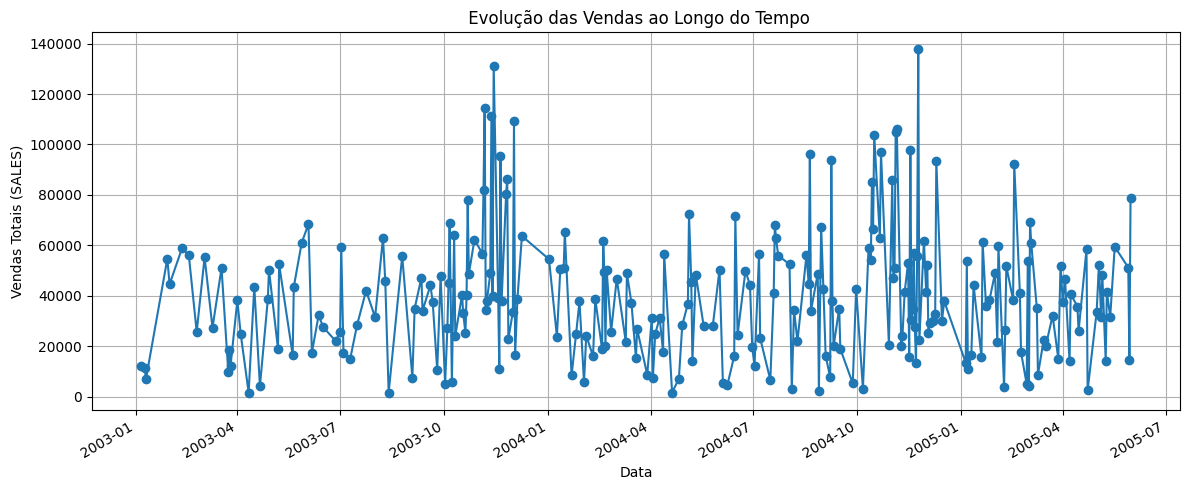

In [14]:
# Garantindo que ORDERDATE esteja como datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Agrupando por data e somando as vendas
vendas_por_data = df.groupby('ORDERDATE')['SALES'].sum()

# Gráfico de linha
plt.figure(figsize=(12, 5))
vendas_por_data.plot(kind='line', marker='o')
plt.title(' Evolução das Vendas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Vendas Totais (SALES)')
plt.grid(True)
plt.tight_layout()
plt.show()

>O gráfico de linha mostra como as vendas variaram ao longo do tempo.Esse padrão ajuda a planejar estoques e promoções em momentos estratégicos.

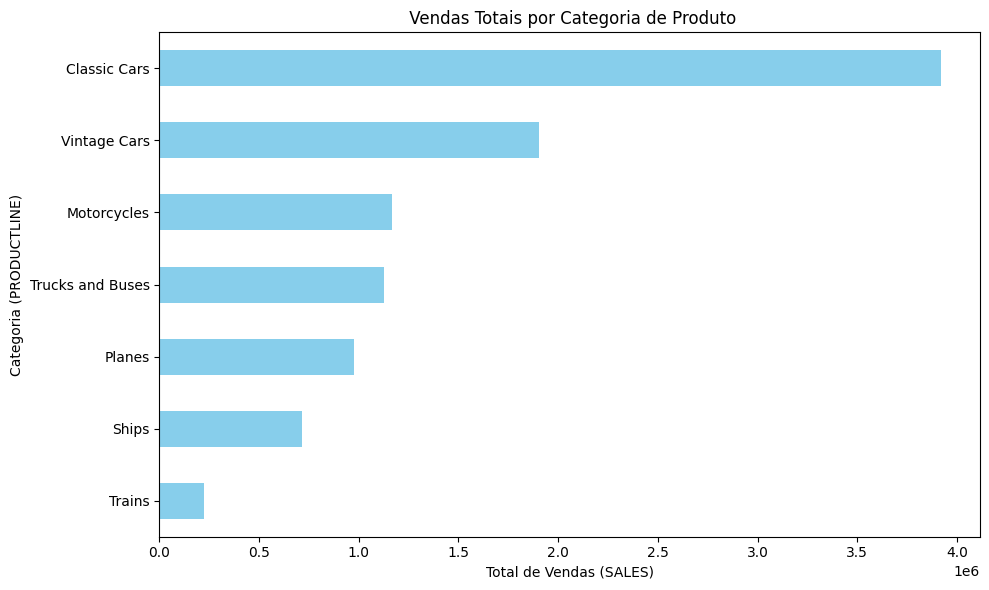

In [15]:
# Agrupando por categoria (PRODUCTLINE)
vendas_por_categoria = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values()

# Gráfico de barras
plt.figure(figsize=(10, 6))
vendas_por_categoria.plot(kind='barh', color='skyblue')
plt.title(' Vendas Totais por Categoria de Produto')
plt.xlabel('Total de Vendas (SALES)')
plt.ylabel('Categoria (PRODUCTLINE)')
plt.tight_layout()
plt.show()

> O gráfico de barras revela que a categoria Classic Cars lidera em volume de vendas, seguida por outras como Motorcycles e Ships. Visualmente, é fácil comparar o desempenho das linhas de produto, o que auxilia na definição de prioridades de marketing e estoque.

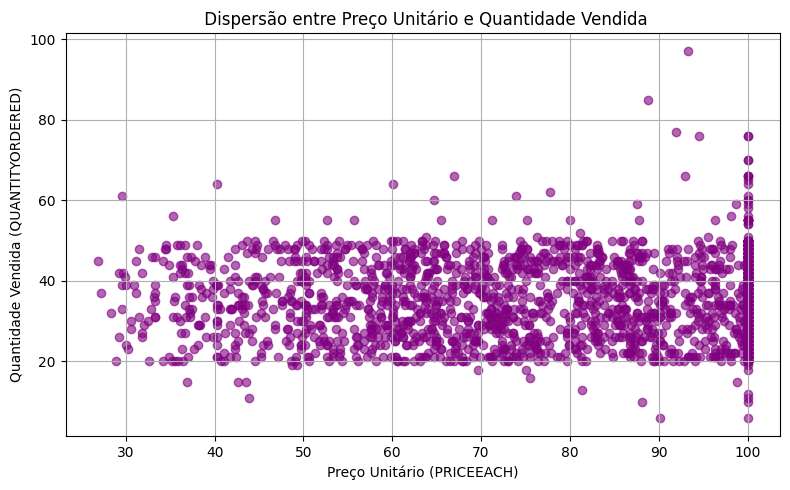

In [16]:
# Gráfico de dispersão
plt.figure(figsize=(8, 5))
plt.scatter(df['PRICEEACH'], df['QUANTITYORDERED'], alpha=0.6, color='purple')
plt.title(' Dispersão entre Preço Unitário e Quantidade Vendida')
plt.xlabel('Preço Unitário (PRICEEACH)')
plt.ylabel('Quantidade Vendida (QUANTITYORDERED)')
plt.grid(True)
plt.tight_layout()
plt.show()

>O gráfico de dispersão mostra a relação entre preço e quantidade. A maioria das vendas se concentra em produtos de preço médio ( 60 a 100 reais)  e quantidades entre 20 e 50. Há poucos pontos extremos  o que indica que produtos mais caros são vendidos em menor volume, o que é esperado em produtos premium.

### **Relatório final**

✅ 2. Listas, Dicionários e Tuplas

Insight: Os dados indicam que clientes corporativos realizam compras elevadas de linhas premium, como "Motorcycles".

✅ 3. Condicionais, Laços e Classificação de Valores

 Insight: Produtos analisados têm ticket médio alto, reforçando a ideia de um mercado voltado para exclusividade.

✅ 4. Operações Aritméticas e Novas Colunas

Insight: A margem por item pode ser grande, e a política de desconto pode influenciar significativamente o total da venda.

✅ 5. NumPy e Arrays Numéricos

Insight: Quantidades vendidas variam, mas com média acima de 30 itens por pedido, indicando pedidos robustos.

✅ 6. Filtragens, Agrupamentos e Análises Agregadas

Insight: "Classic Cars" lidera tanto em quantidade quanto em volume de vendas, seguido por "Motorcycles" e "Ships".


✅ 7. Visualizações Gráficas

📈 Gráfico de Linha – Evolução das Vendas ao Longo do Tempo
Mostra variações sazonais com picos pontuais de vendas.

📊 Gráfico de Barras – Vendas Totais por Categoria
Visualmente destaca as categorias de maior performance no faturamento.

📍 Gráfico de Dispersão – Relação entre Preço e Quantidade
Mostra que produtos mais baratos tendem a ser vendidos em maiores quantidades.


📌 **Conclusão**

Este projeto demonstrou como realizar uma análise de dados comercial com Python, Pandas, NumPy e Matplotlib. A base sales_data_sample.csv revelou-se rica em informações, possibilitando análises de perfil de cliente, desempenho por categoria, sazonalidade e comportamento de vendas por preço.
